# Bpp

1. Import the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
%matplotlib inline
warnings.filterwarnings('ignore')
sns.set_style("darkgrid")

In [3]:
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

2. Read and understand the data

In [4]:
bikes = pd.read_csv("uci_edu_day.csv" , sep=",")

In [5]:
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
bikes.drop('instant', axis = 1, inplace = True) 
# we drop the column instant as we have our own index and additional index not required.

In [7]:
bikes.head(1)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


In [8]:
bikes.shape
# The dataframe has 730 rows and 15 columns

(731, 15)

In [9]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      731 non-null    object 
 1   season      731 non-null    int64  
 2   yr          731 non-null    int64  
 3   mnth        731 non-null    int64  
 4   holiday     731 non-null    int64  
 5   weekday     731 non-null    int64  
 6   workingday  731 non-null    int64  
 7   weathersit  731 non-null    int64  
 8   temp        731 non-null    float64
 9   atemp       731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  casual      731 non-null    int64  
 13  registered  731 non-null    int64  
 14  cnt         731 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 85.8+ KB


In [10]:
bikes.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### 3.Exploratory Data Analysis
3.1 Check for missing values

In [11]:
bikes.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Inference : There are no missing values

3.2 Check for outliers

In [12]:
bikes.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### **Inference : All the values look genuine. There are no outliers ...???

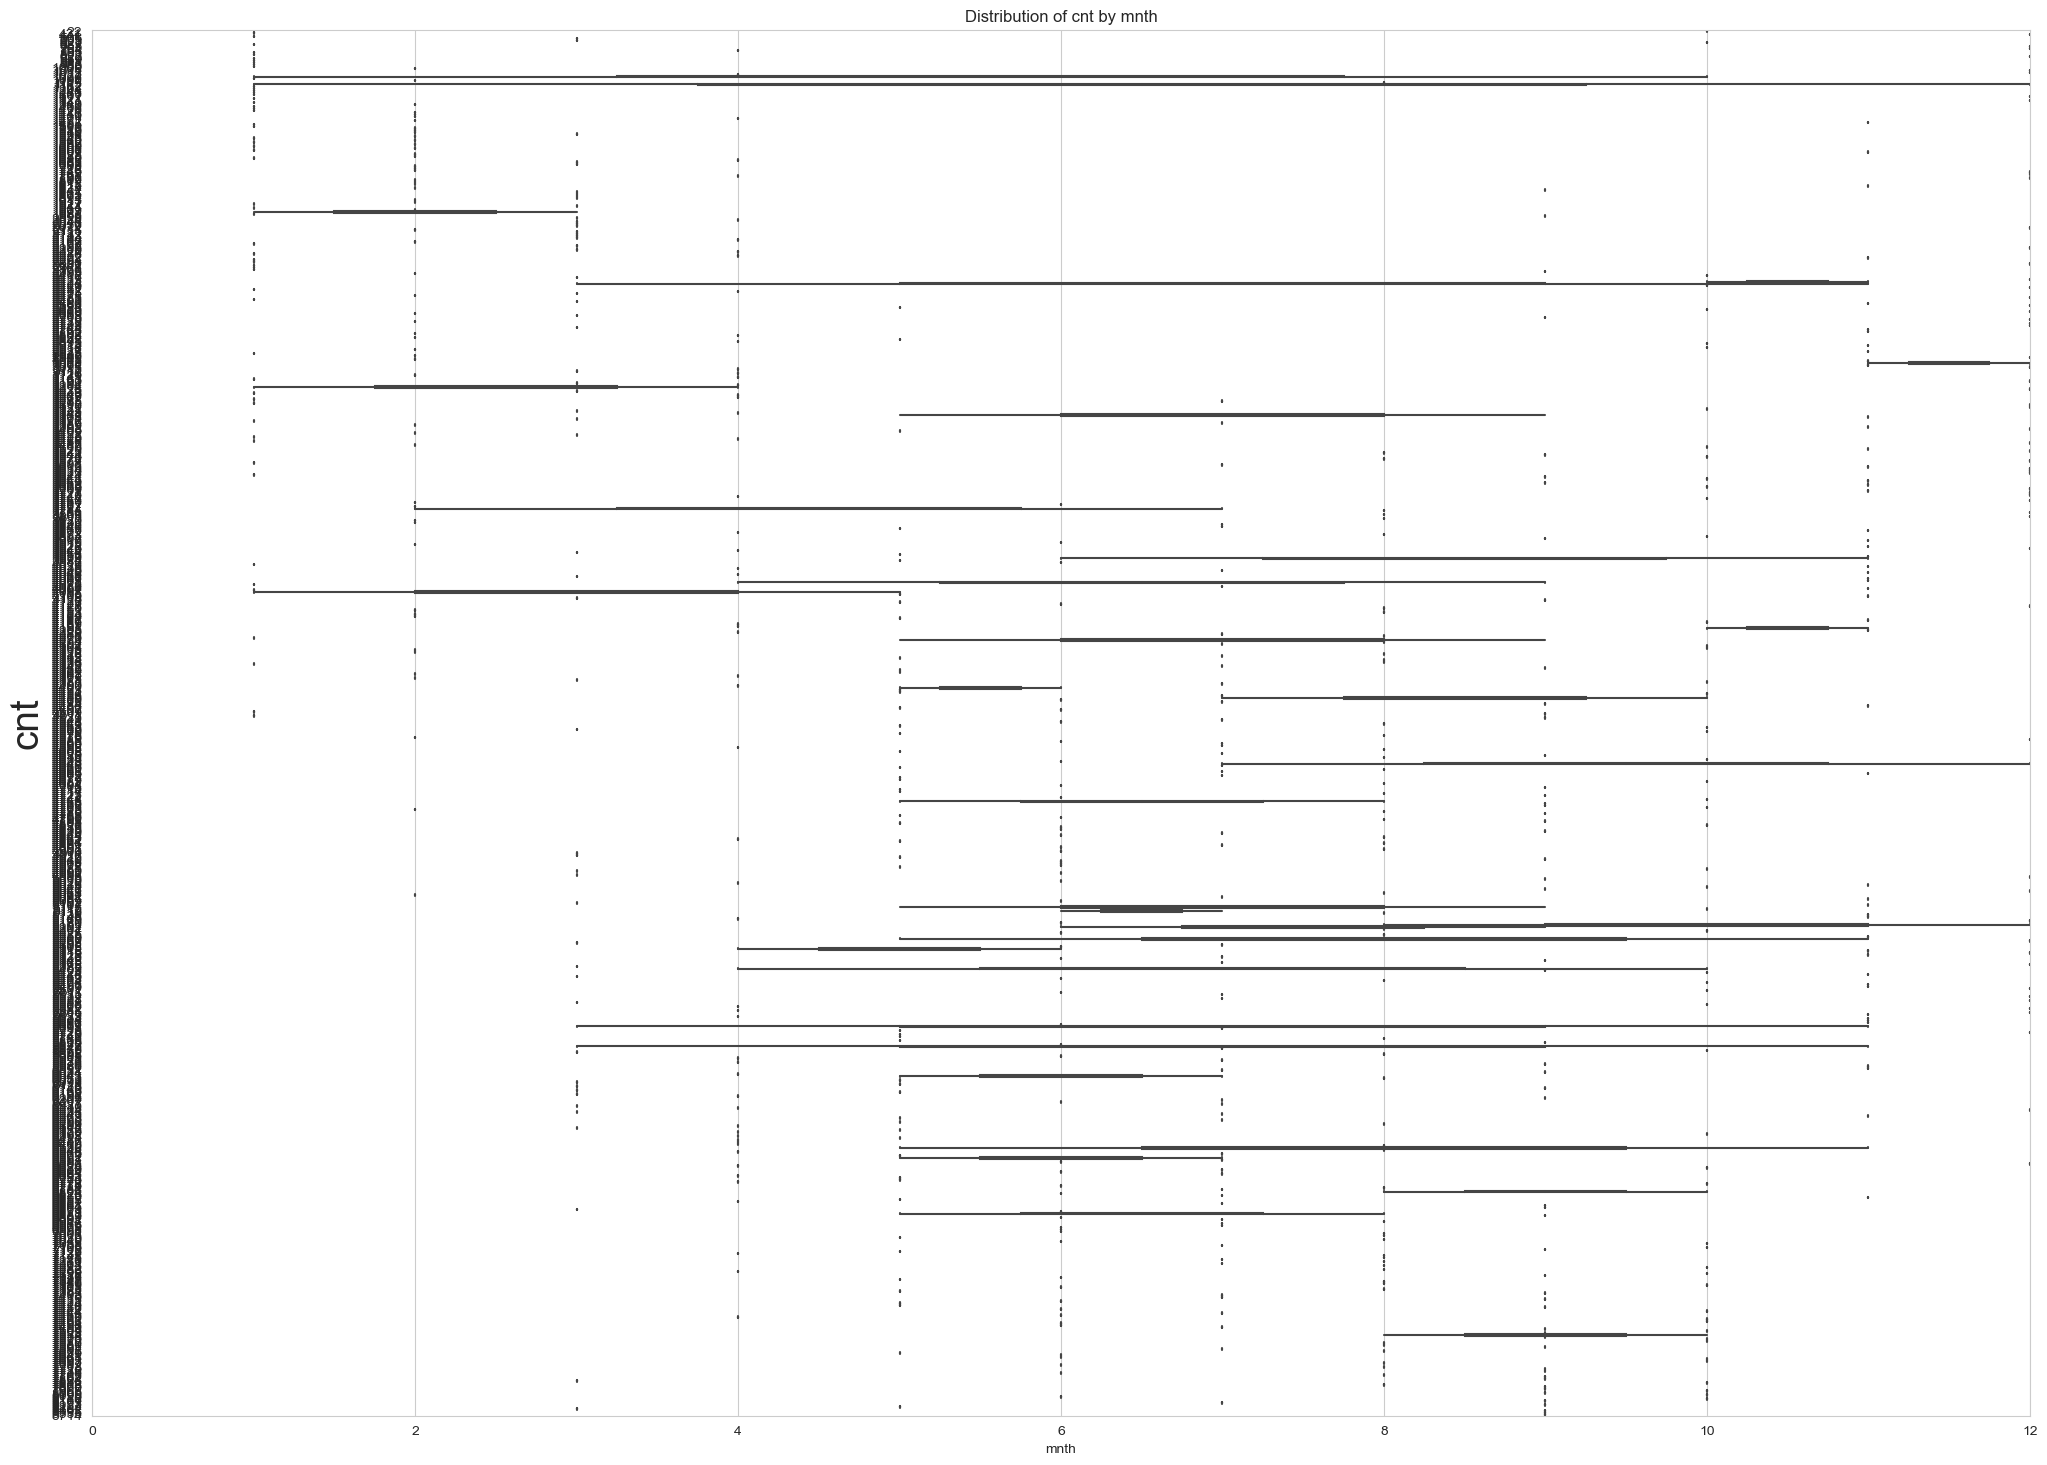

In [13]:
sns.set_style('whitegrid')
sns.set_palette("husl")
fig, ax = plt.subplots(figsize=(25, 18))
ax.set_ylim(0, 9000)
ax.set_xlim(0, 12)
sns.boxplot(x='mnth', y='cnt', data=bikes, orient='h')
plt.title('Distribution of cnt by mnth')
plt.xlabel('mnth')
plt.ylabel('cnt', fontsize=28)
plt.show()

Text(0, 0.5, 'cnt')

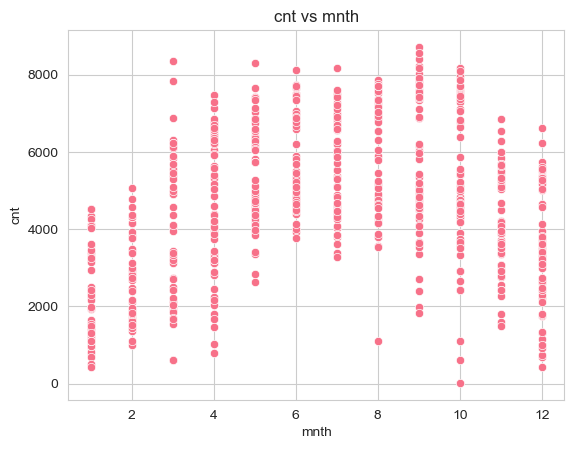

In [14]:
sns.scatterplot(data=bikes, x='mnth', y='cnt')
ax.set_ylim(0, 9000)
ax.set_xlim(0, 14)
plt.title('cnt vs mnth')
plt.xlabel('mnth')
plt.ylabel('cnt')

3.3 Fixing columns and data types

In [15]:
bikes.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Extract day from dteday column

In [16]:
f = lambda x: x.split("-")[2]

# f = lambda x : x.split("-")[0]   ... in order to extract the year

In [17]:
bikes["dteday"] = bikes["dteday"].apply(f)

In [18]:
bikes.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Assign names to values of season column

In [19]:
def seasn(x):
    if x==1:
        return("spring")
    elif x == 2:
        return("summer")
    elif x == 3:
        return("fall")
    else:
        return("winter")

In [20]:
bikes["season"] = bikes["season"].apply(seasn)

In [21]:
bikes[["season"]].head(3)  # Check if conversion is proper

,season
0,spring
1,spring
2,spring


Assign names to values of weathersit column

In [22]:
def wsit(x):
    if x==1:
        return("clear")
    elif x == 2:
        return("misty")
    elif x == 3:
        return("light_rain")
    else:
        return("heavy_rain")

In [23]:
bikes["weathersit"] = bikes["weathersit"].apply(wsit)

In [24]:
bikes[["weathersit"]].head()  # Check if conversion is proper

,weathersit
0,misty
1,misty
2,clear
3,clear
4,clear


In [25]:
bikes.head(2)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01,spring,0,1,0,6,0,misty,0.344167,0.363625,0.805833,0.160446,331,654,985
1,02,spring,0,1,0,0,0,misty,0.363478,0.353739,0.696087,0.248539,131,670,801


3.4 Univariate Analysis

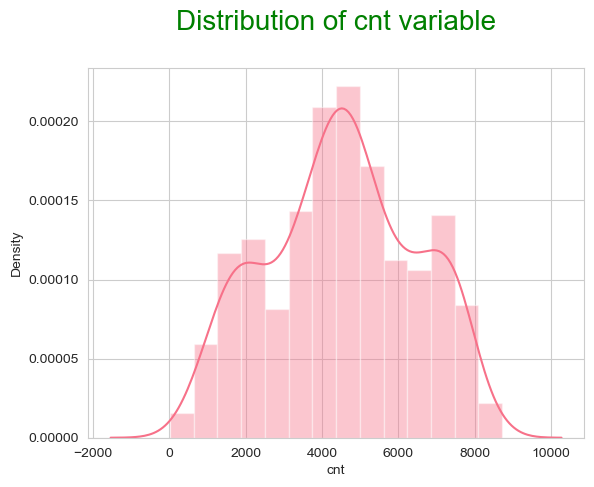

In [26]:
# Analyse cnt variable
sns.distplot(bikes["cnt"])
plt.title("Distribution of cnt variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.show()

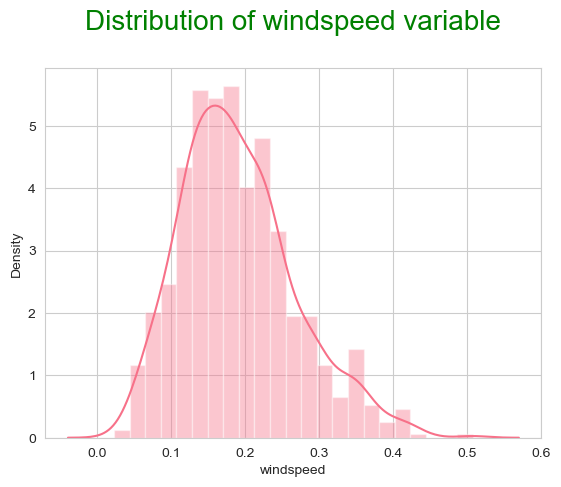

In [27]:
# Analyse windspeed variable
sns.distplot(bikes["windspeed"])
plt.title("Distribution of windspeed variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.show()

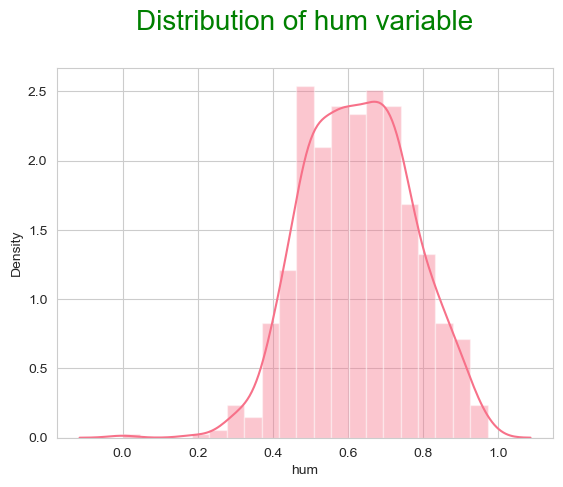

In [28]:
# Analyse hum variable
sns.distplot(bikes["hum"])
plt.title("Distribution of hum variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.show()

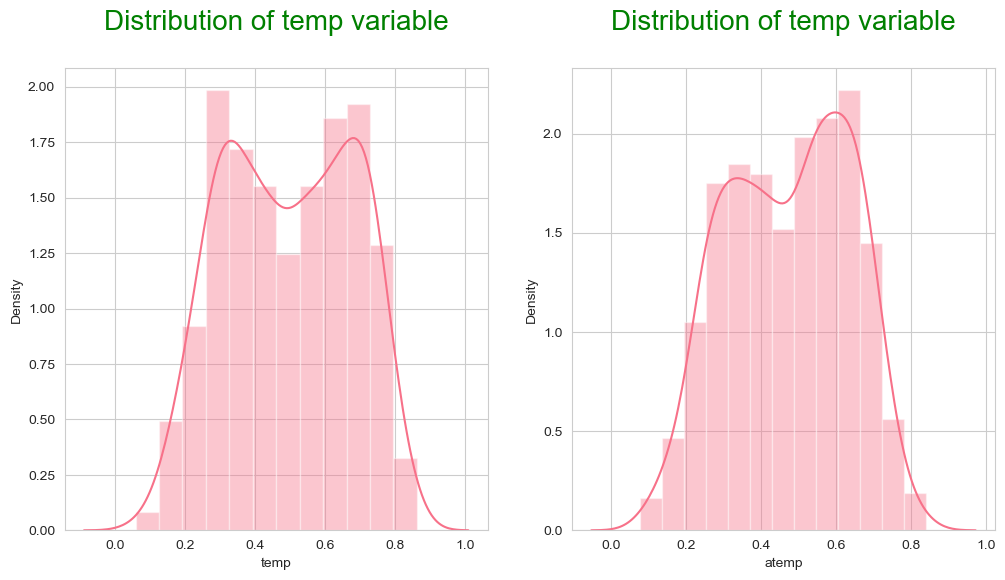

In [29]:
# Analyse temp and atemp variables

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.distplot(bikes["temp"])
plt.title("Distribution of temp variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.subplot(1,2,2)
sns.distplot(bikes["atemp"])
plt.title("Distribution of temp variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.show()

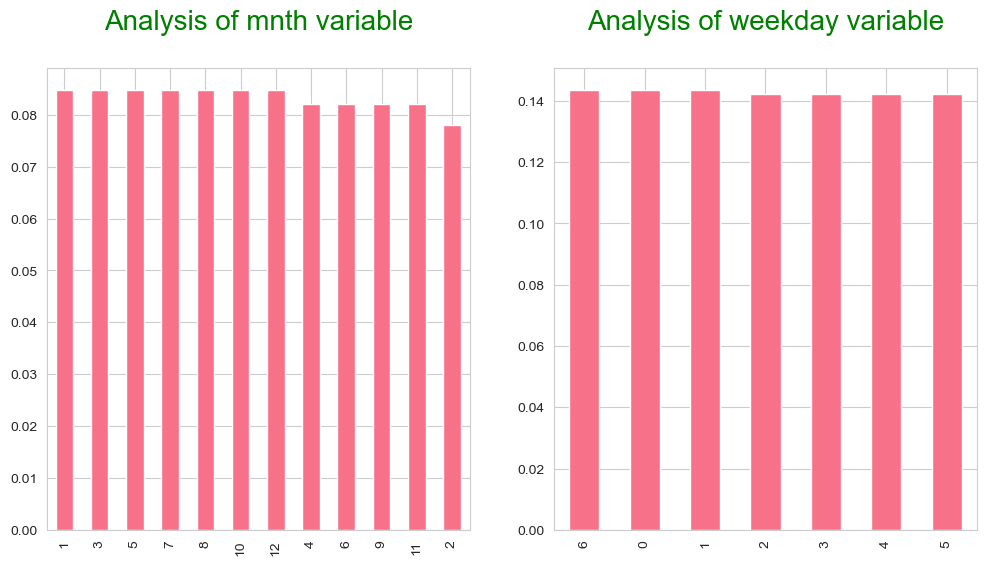

In [30]:
# Analyse mnth and weekday variables

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
bikes["mnth"].value_counts(normalize=True).plot.bar()
plt.title("Analysis of mnth variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.subplot(1,2,2)
bikes["weekday"].value_counts(normalize=True).plot.bar()
plt.title("Analysis of weekday variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.show()

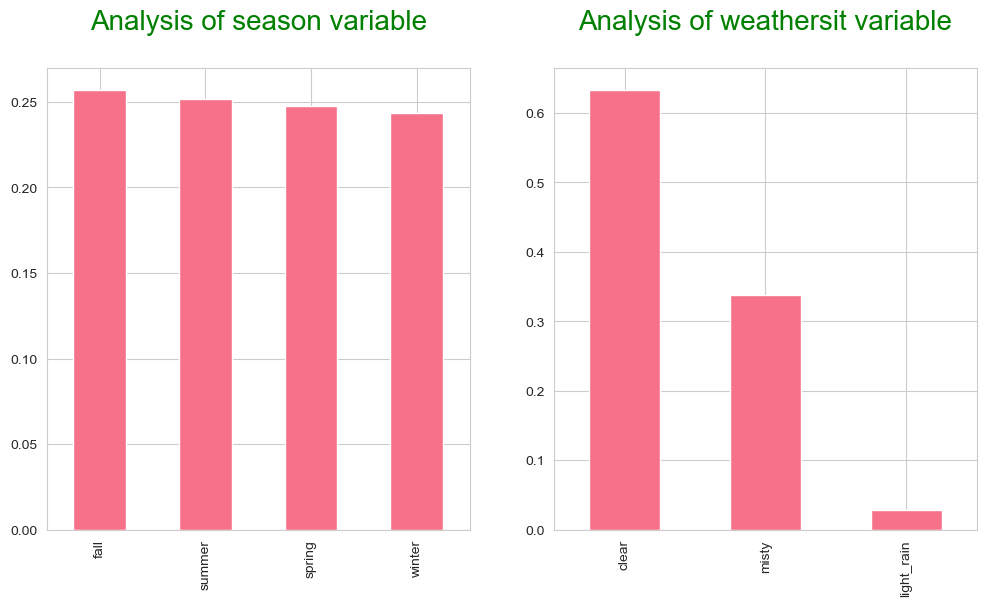

In [31]:
# Analyse season and weathersit variables

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
bikes["season"].value_counts(normalize=True).plot.bar()
plt.title("Analysis of season variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.subplot(1,2,2)
bikes["weathersit"].value_counts(normalize=True).plot.bar()
plt.title("Analysis of weathersit variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.show()

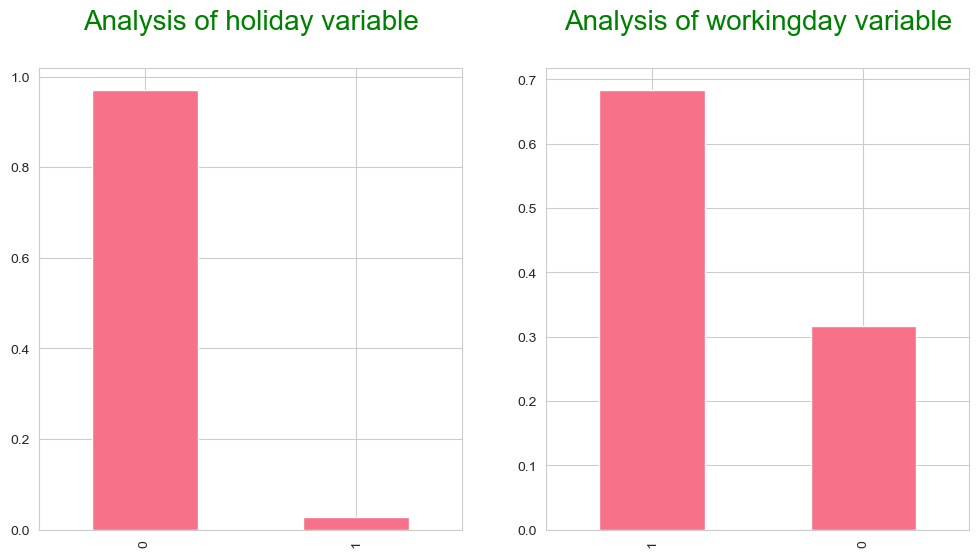

In [32]:
# Analyse holiday and workingday variables

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
bikes["holiday"].value_counts(normalize=True).plot.bar()
plt.title("Analysis of holiday variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.subplot(1,2,2)
bikes["workingday"].value_counts(normalize=True).plot.bar()
plt.title("Analysis of workingday variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.show()

3.5 Bivariate Analysis

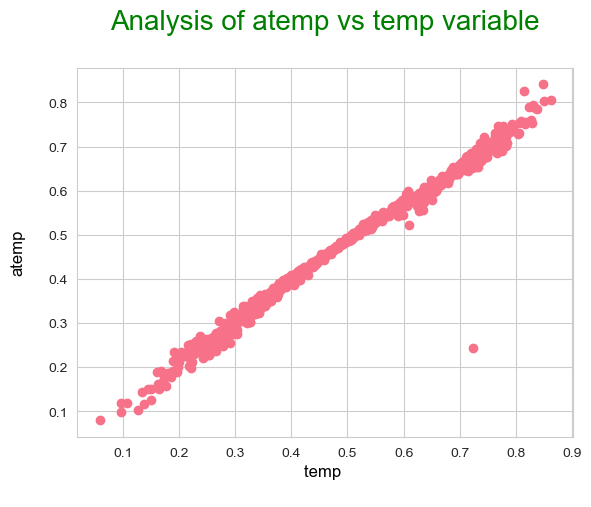

In [33]:
# Scatter plot of atemp vs temp variable
plt.scatter(bikes["temp"], bikes["atemp"])
plt.title("Analysis of atemp vs temp variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("temp \n", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.ylabel("atemp\n", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

In [34]:
bikes.groupby("season")["cnt"].sum()

season
fall      1061129
spring     471348
summer     918589
winter     841613
Name: cnt, dtype: int64

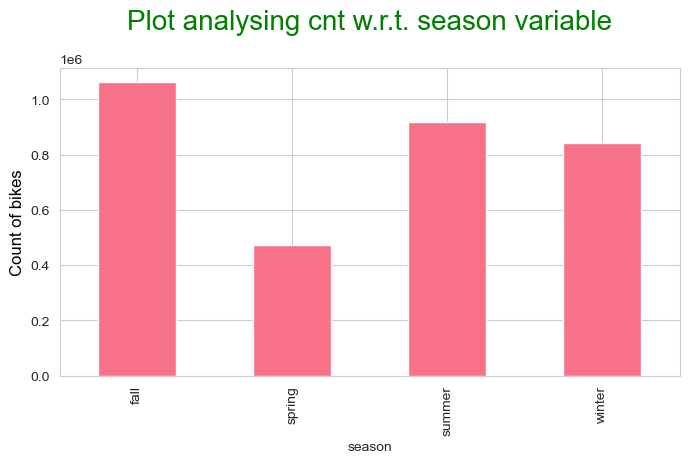

In [35]:
# cnt w.r.t. season

plt.figure(figsize= (8,4))
bikes.groupby("season")["cnt"].sum().plot.bar()
plt.title("Plot analysing cnt w.r.t. season variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.ylabel("Count of bikes", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

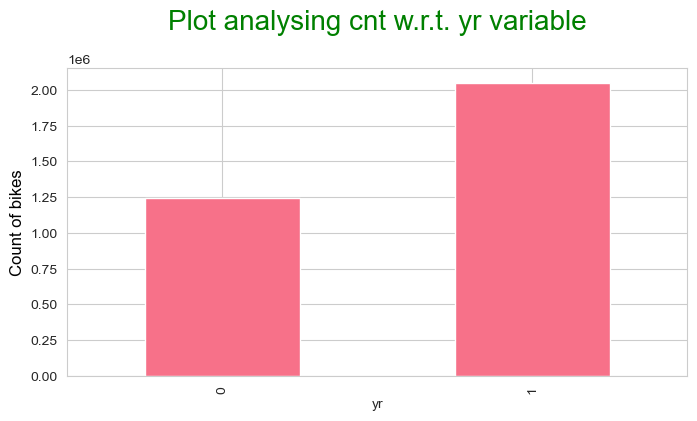

In [36]:
# cnt w.r.t. yr

plt.figure(figsize= (8,4))
bikes.groupby("yr")["cnt"].sum().plot.bar()
plt.title("Plot analysing cnt w.r.t. yr variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.ylabel("Count of bikes", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

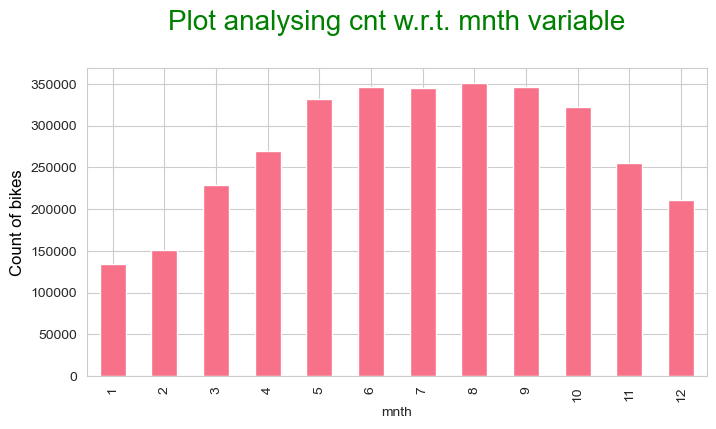

In [37]:
# cnt w.r.t. mnth

plt.figure(figsize= (8,4))
bikes.groupby("mnth")["cnt"].sum().plot.bar()
plt.title("Plot analysing cnt w.r.t. mnth variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.ylabel("Count of bikes", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

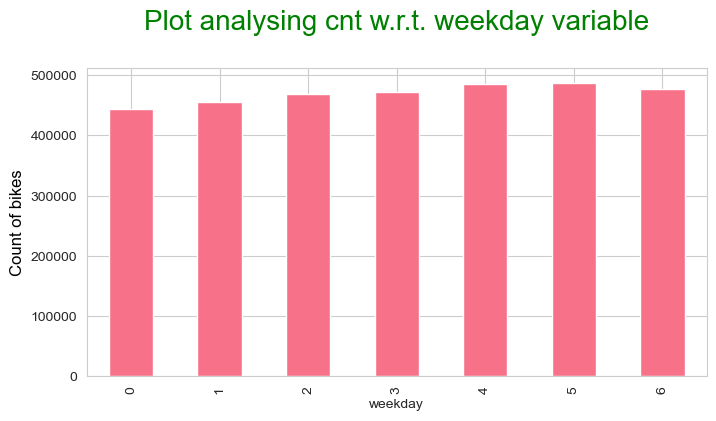

In [38]:
# cnt w.r.t. weekday

plt.figure(figsize= (8,4))
bikes.groupby("weekday")["cnt"].sum().plot.bar()
plt.title("Plot analysing cnt w.r.t. weekday variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.ylabel("Count of bikes", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

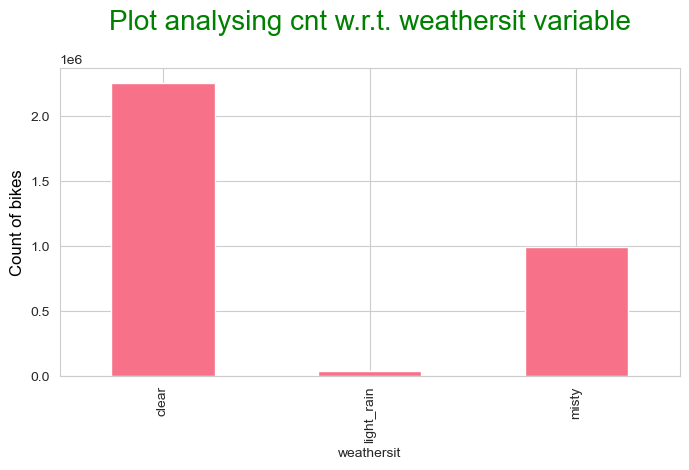

In [39]:
# cnt w.r.t. weathersit

plt.figure(figsize= (8,4))
bikes.groupby("weathersit")["cnt"].sum().plot.bar()
plt.title("Plot analysing cnt w.r.t. weathersit variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.ylabel("Count of bikes", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

3.6 Multivariate Analysis

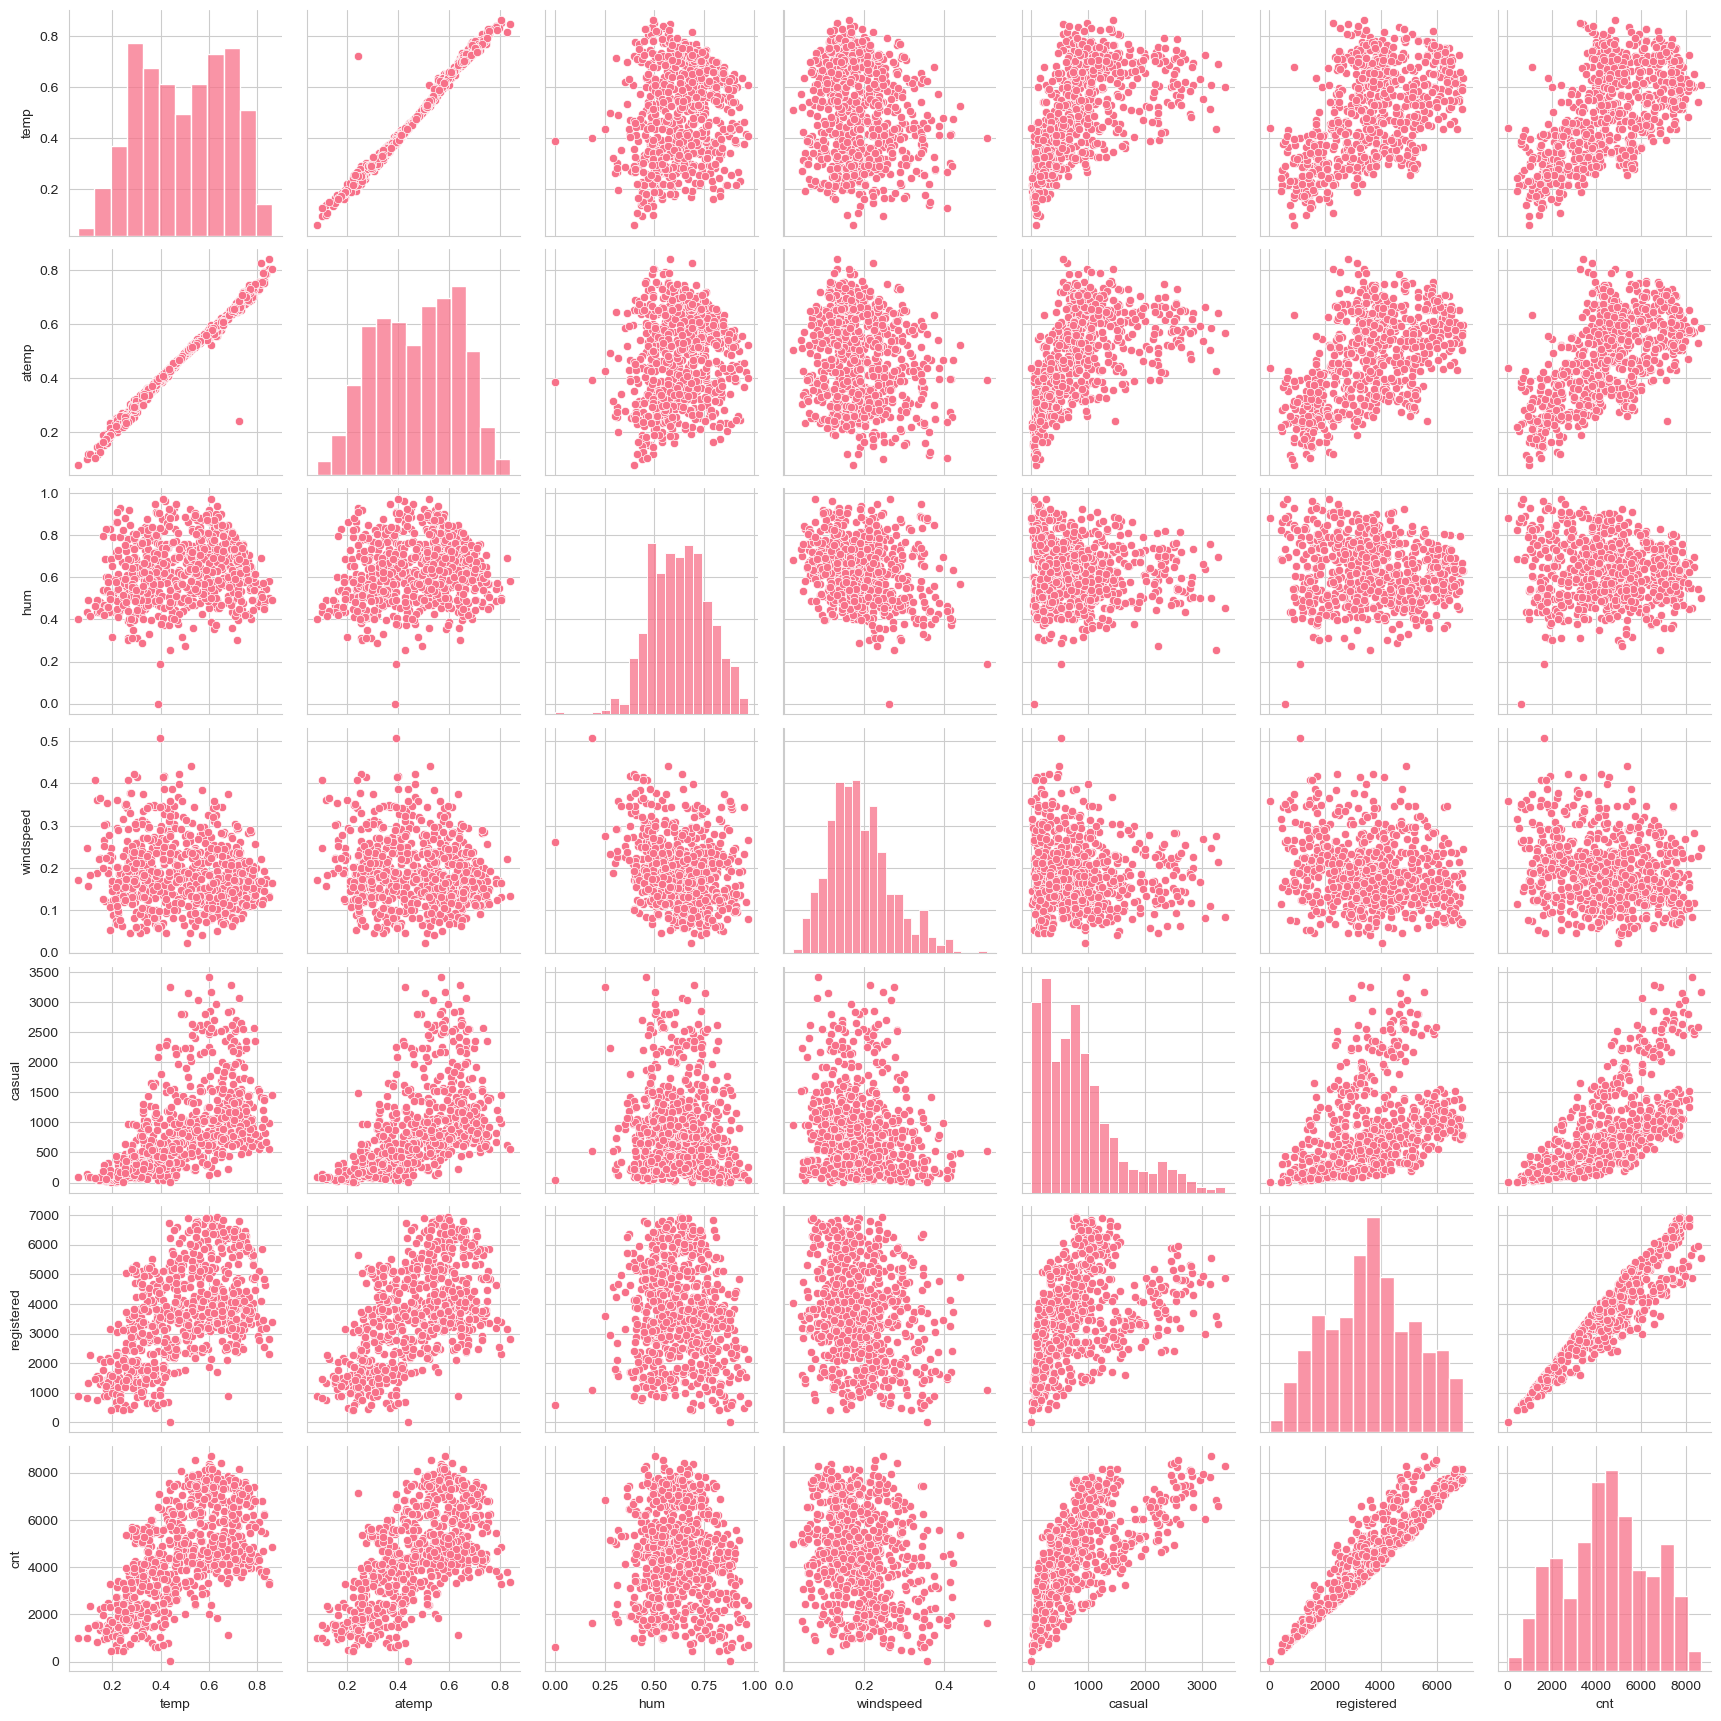

In [40]:
# Pair plot of our data variables

sns.pairplot(data = bikes, vars = ["temp", "atemp", "hum","windspeed","casual","registered","cnt"])
plt.show()

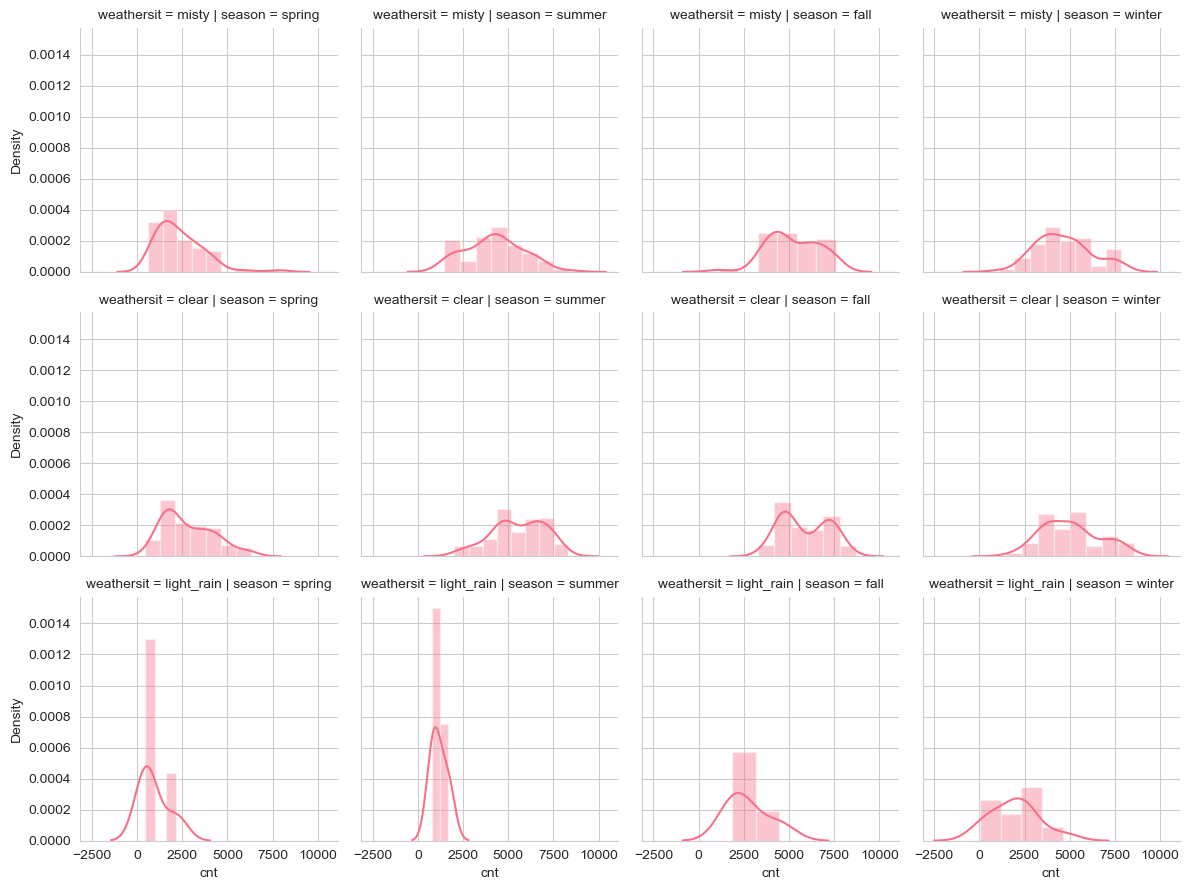

In [41]:
# FacetGrid plot of cnt w.r.t. weathersit and season

sns.FacetGrid(bikes, col = 'season', row = 'weathersit').map(sns.distplot, 'cnt')
plt.show()

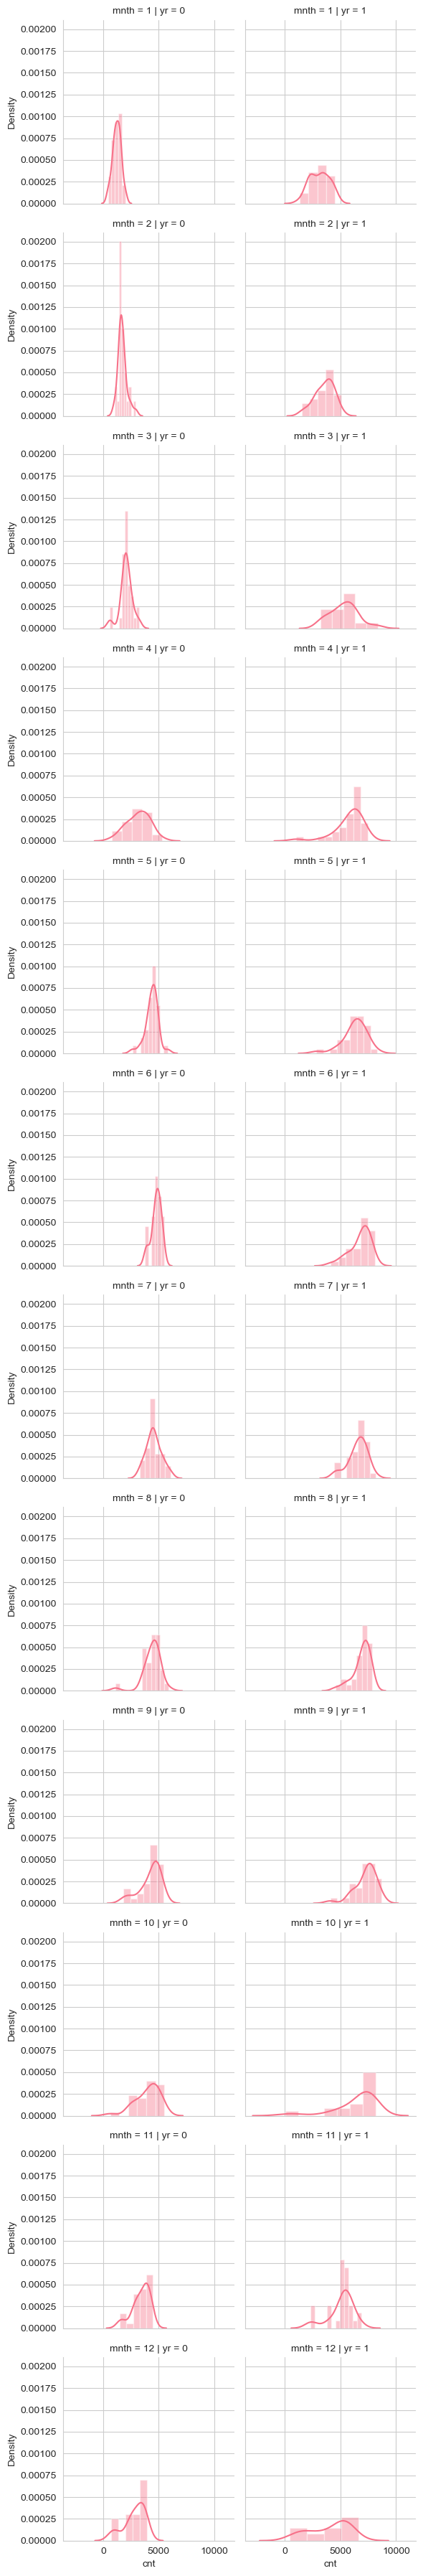

In [42]:
# FacetGrid plotof cnt w.r.t. yr and mnth

sns.FacetGrid(bikes, col = 'yr', row = 'mnth').map(sns.distplot, 'cnt')
plt.show()

Inferences from EDA :
1. Bikes demand is more in 2019 as compared to 2018.
2. Bikes demand is more from months July to September months, on an average.
3. Bikes demand is more from Thursday to Sunday, on an average.
4. Bikes demand is more in clear weather.

### 4. Linear Regression Model building

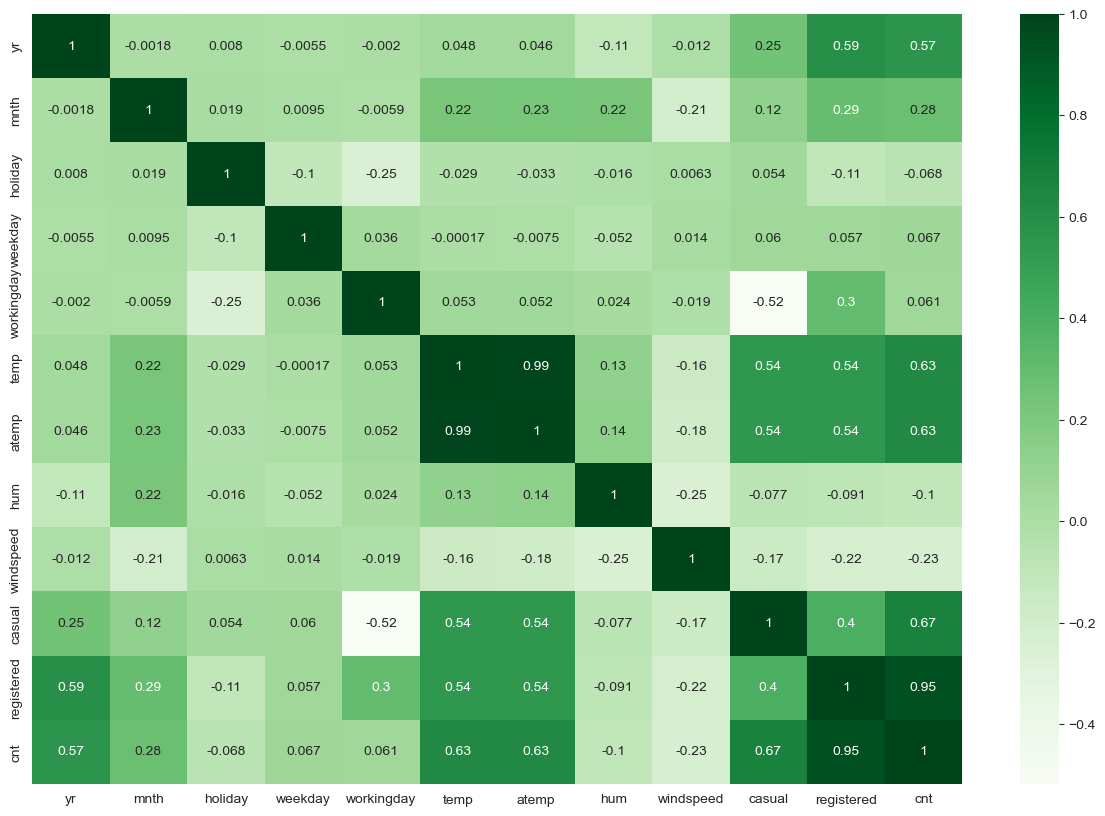

In [43]:
# Heatmap for correlation of variables

plt.figure(figsize=(15,10))
sns.heatmap(bikes.corr(), cmap = "Greens", annot = True)
plt.show()

We can see that temp and atemp have high correlation. From bivariate analysis we have seen that they are just two variables representing simliar data. Also registered and cnt have high correlation. cnt column is just total of casual and registered columns and it is our target variable. So we drop temp, casual and registered columns from our data.

In [44]:
bikes.drop(['temp','casual','registered'], axis = 1, inplace = True)

4.1 Encoding categorical variables

season and weathersit seem to be nominal variables that do not have any inherent order. So we encode them using pd.get_dummies

In [45]:
bikes.head(2)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,01,spring,0,1,0,6,0,misty,0.363625,0.805833,0.160446,985
1,02,spring,0,1,0,0,0,misty,0.353739,0.696087,0.248539,801


In [46]:
new_season = pd.get_dummies(bikes['season'], drop_first=True)

In [47]:
new_season

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
726,1,0,0
727,1,0,0
728,1,0,0
729,1,0,0


In [48]:
bikes = pd.concat([bikes, new_season], axis = 1)

In [49]:
bikes.head()  # see weather concatenation is proper

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,spring,summer,winter
0,01,spring,0,1,0,6,0,misty,0.363625,0.805833,0.160446,985,1,0,0
1,02,spring,0,1,0,0,0,misty,0.353739,0.696087,0.248539,801,1,0,0
2,03,spring,0,1,0,1,1,clear,0.189405,0.437273,0.248309,1349,1,0,0
3,04,spring,0,1,0,2,1,clear,0.212122,0.590435,0.160296,1562,1,0,0
4,05,spring,0,1,0,3,1,clear,0.229270,0.436957,0.186900,1600,1,0,0


In [50]:
new_weathersit = pd.get_dummies(bikes['weathersit'], drop_first=True)

In [51]:
new_weathersit.head()

,light_rain,misty
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [52]:
bikes = pd.concat([bikes, new_weathersit], axis = 1)

In [53]:
bikes.head()  # see weather concatenation is proper

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,spring,summer,winter,light_rain,misty
0,01,spring,0,1,0,6,0,misty,0.363625,0.805833,0.160446,985,1,0,0,0,1
1,02,spring,0,1,0,0,0,misty,0.353739,0.696087,0.248539,801,1,0,0,0,1
2,03,spring,0,1,0,1,1,clear,0.189405,0.437273,0.248309,1349,1,0,0,0,0
3,04,spring,0,1,0,2,1,clear,0.212122,0.590435,0.160296,1562,1,0,0,0,0
4,05,spring,0,1,0,3,1,clear,0.229270,0.436957,0.186900,1600,1,0,0,0,0


In [54]:
bikes.drop('season', axis = 1, inplace = True)    # drop season column

In [55]:
bikes.drop('weathersit', axis = 1, inplace = True)     # drop weathersit column

In [56]:
bikes.head(2)

,dteday,yr,mnth,holiday,weekday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,light_rain,misty
0,01,0,1,0,6,0,0.363625,0.805833,0.160446,985,1,0,0,0,1
1,02,0,1,0,0,0,0.353739,0.696087,0.248539,801,1,0,0,0,1


dteday, mnth and weekday are also categorical variables. But the number of levels in these columns are too high. So we use LabelEncoder to encode them.

In [57]:
from sklearn.preprocessing import LabelEncoder     # import LabelEncoder

In [58]:
var = ["dteday", "mnth", "weekday"]

In [59]:
le = LabelEncoder()  # Create instance le for LabelEncoder

In [60]:
f = lambda x : le.fit_transform(x)

In [61]:
bikes[var] = bikes[var].apply(f)

In [62]:
bikes.head(5)

,dteday,yr,mnth,holiday,weekday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,light_rain,misty
0,0,0,0,0,6,0,0.363625,0.805833,0.160446,985,1,0,0,0,1
1,1,0,0,0,0,0,0.353739,0.696087,0.248539,801,1,0,0,0,1
2,2,0,0,0,1,1,0.189405,0.437273,0.248309,1349,1,0,0,0,0
3,3,0,0,0,2,1,0.212122,0.590435,0.160296,1562,1,0,0,0,0
4,4,0,0,0,3,1,0.229270,0.436957,0.186900,1600,1,0,0,0,0


4.2 Split the data set into df_train and df_test

In [63]:
df_train, df_test = train_test_split(bikes, train_size = 0.7, test_size = 0.3, random_state = 100)

In [64]:
df_train.shape

(511, 15)

In [65]:
df_test.shape

(220, 15)

4.3 Scale the numerical variables of train data

In [66]:
scaler = MinMaxScaler()

In [67]:
scale_var = ["dteday", "mnth","weekday", "atemp", "hum", "windspeed", "cnt"]

In [68]:
df_train[scale_var] = scaler.fit_transform(df_train[scale_var])  # Scaling of train set 

In [69]:
df_train.describe()  # Check if scaling is proper

,dteday,yr,mnth,holiday,weekday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,light_rain,misty
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.488193,0.508806,0.503291,0.023483,0.499674,0.667319,0.512443,0.648573,0.317963,0.515061,0.244618,0.246575,0.248532,0.027397,0.348337
std,0.297355,0.500412,0.315409,0.151581,0.339566,0.471635,0.213364,0.148691,0.165339,0.225338,0.430282,0.431440,0.432585,0.163398,0.476910
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.233333,0.000000,0.181818,0.000000,0.166667,0.000000,0.332910,0.534994,0.199179,0.356765,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,1.000000,0.545455,0.000000,0.500000,1.000000,0.516885,0.653499,0.294121,0.519903,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.733333,1.000000,0.818182,0.000000,0.833333,1.000000,0.684716,0.755689,0.406058,0.691498,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


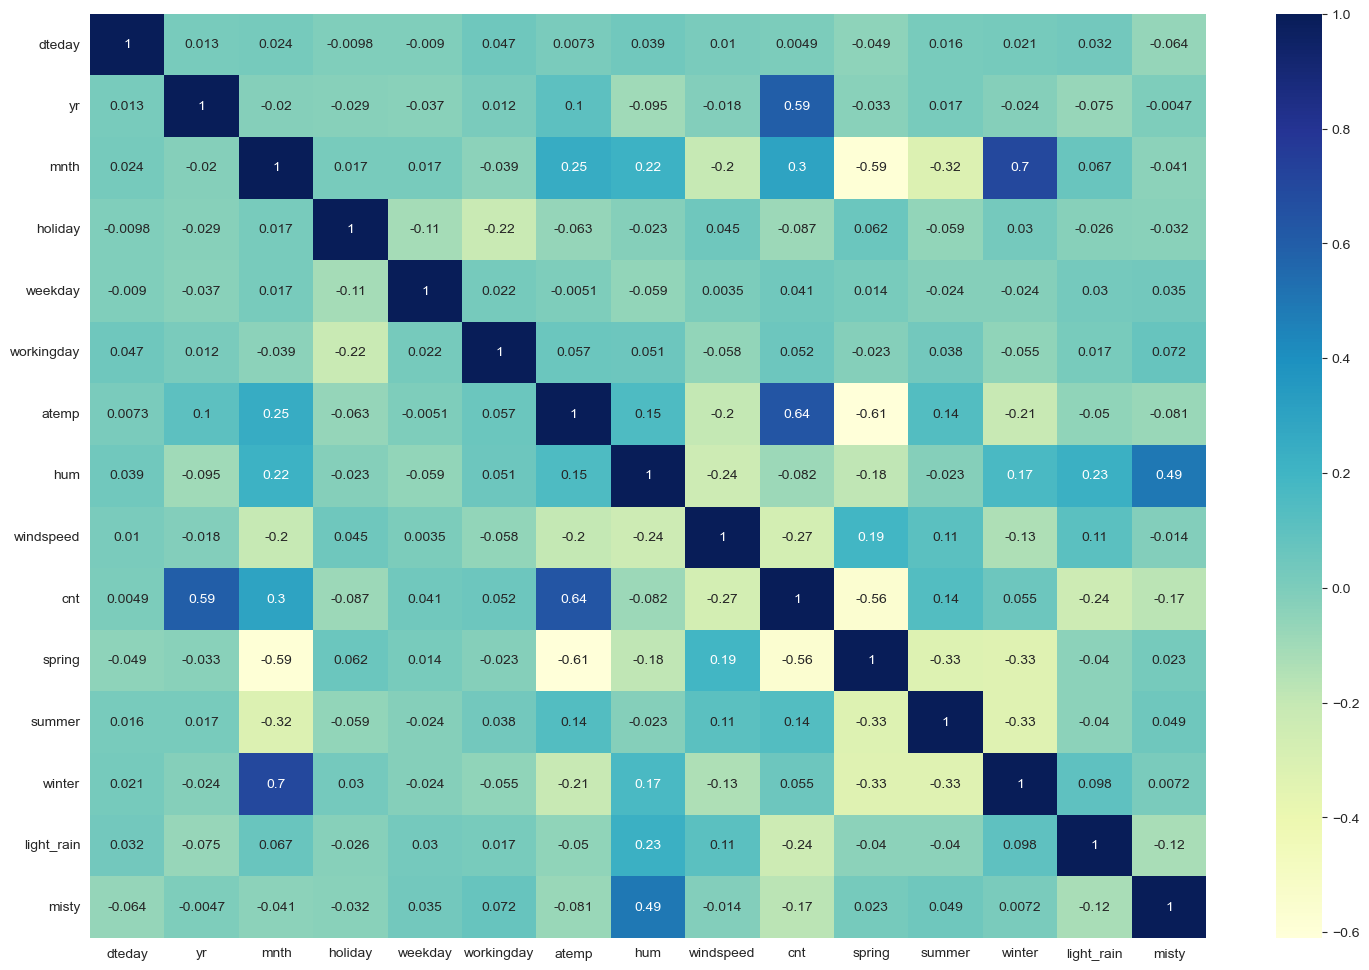

In [70]:
# Train data variables heatmap

plt.figure(figsize= (18,12))
sns.heatmap(df_train.corr(), cmap = "YlGnBu", annot = True);

4.4 Builiding Multiple Linear Regression Model using statsmodels.api

In [71]:
y_train = df_train.pop('cnt')
X_train = df_train

In [72]:
X_train_sm = sm.add_constant(X_train)    # add constant to X_train

In [73]:
lr1 = sm.OLS(y_train, X_train_sm).fit()    # create instance lr1

In [74]:
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     176.9
Date:                Wed, 10 May 2023   Prob (F-statistic):          1.62e-182
Time:                        15:39:11   Log-Likelihood:                 494.41
No. Observations:                 511   AIC:                            -958.8
Df Residuals:                     496   BIC:                            -895.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2927      0.038      7.645      0.000       0.217       0.368
dteday        -0.0126      0.014     -0.894      0.372      -0.040       0.015
yr             0.2354      0.008     27.948      0.000       0.219       0.252
mnth           0.0074      0.026      0.284      0.777      -0.044       0.058
holiday       -0.0358      0.028     -1.267      0.206      -0.091       0.020
weekday        0.0473      0.012      3.820      0.000       0.023       0.072
workingday     0.0113      0.009      1.247      0.213      -0.006       0.029
atemp          0.4722      0.035     13.579      0.000       0.404       0.541
hum           -0.1340      0.038     -3.491      0.001      -0.209      -0.059
windspeed     -0.1645      0.027     -6.013      0.000      -0.218      -0.111
spring        -0.1056      0.022     -4.731      0.000      -0.149      -0.062
summer         0.0285      0.015      1.887      0.060      -0.001       0.058
winter         0.0657      0.018      3.706      0.000       0.031       0.101
light_rain    -0.2423      0.028     -8.577      0.000      -0.298      -0.187
misty         -0.0546      0.011     -4.947      0.000      -0.076      -0.033
==============================================================================
Omnibus:                       72.850   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              157.912
Skew:                          -0.777   Prob(JB):                     5.13e-35
Kurtosis:                       5.236   Cond. No.                         23.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Inference : R-squared and adjusted R-squared values are close and high (0.826 and 0.821 respectively), F-statistics values are acceptable. But the p-values of certain variables are high

Let us also look at the multicollinearity among the variables

In [75]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [76]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,hum,29.91
6,atemp,15.85
2,mnth,12.63
8,windspeed,4.91
9,spring,4.28
11,winter,4.21
0,dteday,3.68
4,weekday,3.13
5,workingday,3.12
10,summer,2.55


Decision : From above statistics figures we decide to drop dteday column



In [77]:
X_train.drop('dteday', axis = 1, inplace = True)

In [78]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     190.5
Date:                Wed, 10 May 2023   Prob (F-statistic):          1.71e-183
Time:                        15:39:11   Log-Likelihood:                 493.99
No. Observations:                 511   AIC:                            -960.0
Df Residuals:                     497   BIC:                            -900.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2873      0.038      7.600      0.000       0.213       0.362
yr             0.2352      0.008     27.940      0.000       0.219       0.252
mnth           0.0078      0.026      0.302      0.763      -0.043       0.059
holiday       -0.0358      0.028     -1.269      0.205      -0.091       0.020
weekday        0.0473      0.012      3.817      0.000       0.023       0.072
workingday     0.0109      0.009      1.202      0.230      -0.007       0.029
atemp          0.4740      0.035     13.655      0.000       0.406       0.542
hum           -0.1371      0.038     -3.588      0.000      -0.212      -0.062
windspeed     -0.1654      0.027     -6.054      0.000      -0.219      -0.112
spring        -0.1043      0.022     -4.685      0.000      -0.148      -0.061
summer         0.0289      0.015      1.912      0.056      -0.001       0.059
winter         0.0661      0.018      3.729      0.000       0.031       0.101
light_rain    -0.2418      0.028     -8.562      0.000      -0.297      -0.186
misty         -0.0536      0.011     -4.880      0.000      -0.075      -0.032
==============================================================================
Omnibus:                       76.041   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.494
Skew:                          -0.803   Prob(JB):                     4.26e-37
Kurtosis:                       5.300   Cond. No.                         23.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,hum,28.85
5,atemp,15.84
1,mnth,12.62
7,windspeed,4.86
8,spring,4.27
10,winter,4.20
3,weekday,3.12
4,workingday,3.11
9,summer,2.54
12,misty,2.36


**Inference : R-squared and adjusted R-squared values are close and high (0.826 and 0.822 respectively), F-statistics values are acceptable. But the p-values of certain variables are high. Also hum variable has high VIF so we drop hum column.

In [80]:
X_train.drop('hum', axis = 1, inplace = True)


In [81]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     200.6
Date:                Wed, 10 May 2023   Prob (F-statistic):          6.62e-182
Time:                        15:39:11   Log-Likelihood:                 487.46
No. Observations:                 511   AIC:                            -948.9
Df Residuals:                     498   BIC:                            -893.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2209      0.033      6.623      0.000       0.155       0.286
yr             0.2390      0.008     28.283      0.000       0.222       0.256
mnth          -0.0024      0.026     -0.090      0.928      -0.054       0.049
holiday       -0.0363      0.029     -1.271      0.204      -0.092       0.020
weekday        0.0525      0.012      4.219      0.000       0.028       0.077
workingday     0.0110      0.009      1.202      0.230      -0.007       0.029
atemp          0.4452      0.034     13.028      0.000       0.378       0.512
windspeed     -0.1397      0.027     -5.236      0.000      -0.192      -0.087
spring        -0.1152      0.022     -5.162      0.000      -0.159      -0.071
summer         0.0229      0.015      1.504      0.133      -0.007       0.053
winter         0.0580      0.018      3.259      0.001       0.023       0.093
light_rain    -0.2815      0.026    -10.707      0.000      -0.333      -0.230
misty         -0.0771      0.009     -8.633      0.000      -0.095      -0.060
==============================================================================
Omnibus:                       71.667   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              149.438
Skew:                          -0.780   Prob(JB):                     3.55e-33
Kurtosis:                       5.142   Cond. No.                         21.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Inference : R-squared and adjusted R-squared values are close and high (0.822 and 0.818 respectively), F-statistics values are acceptable. But the p-values of certain variables are high. Let's see VIF values.

In [82]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,mnth,11.35
5,atemp,9.04
6,windspeed,4.81
9,winter,3.77
3,weekday,3.12
4,workingday,3.08
7,spring,2.41
0,yr,2.07
8,summer,2.02
11,misty,1.57


mnth column has high p-value and it's VIF is also high. So we drop mnth column.

In [83]:
X_train.drop('mnth', axis = 1, inplace = True)

In [84]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     219.2
Date:                Wed, 10 May 2023   Prob (F-statistic):          4.38e-183
Time:                        15:39:12   Log-Likelihood:                 487.45
No. Observations:                 511   AIC:                            -950.9
Df Residuals:                     499   BIC:                            -900.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2196      0.030      7.270      0.000       0.160       0.279
yr             0.2391      0.008     28.354      0.000       0.223       0.256
holiday       -0.0364      0.029     -1.276      0.203      -0.092       0.020
weekday        0.0524      0.012      4.225      0.000       0.028       0.077
workingday     0.0110      0.009      1.206      0.228      -0.007       0.029
atemp          0.4449      0.034     13.070      0.000       0.378       0.512
windspeed     -0.1397      0.027     -5.244      0.000      -0.192      -0.087
spring        -0.1143      0.020     -5.783      0.000      -0.153      -0.075
summer         0.0235      0.013      1.742      0.082      -0.003       0.050
winter         0.0572      0.016      3.601      0.000       0.026       0.088
light_rain    -0.2815      0.026    -10.718      0.000      -0.333      -0.230
misty         -0.0770      0.009     -8.642      0.000      -0.095      -0.060
==============================================================================
Omnibus:                       71.603   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              149.108
Skew:                          -0.779   Prob(JB):                     4.18e-33
Kurtosis:                       5.139   Cond. No.                         19.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,atemp,5.24
5,windspeed,4.69
3,workingday,3.07
2,weekday,3.05
6,spring,2.28
0,yr,2.07
7,summer,1.86
8,winter,1.69
10,misty,1.56
1,holiday,1.09


**Inference : R-squared and adjusted R-squared values are close and high (0.822 and 0.818 respectively), F-statistics values are acceptable. But the p-values of certain variables are high. weekday variable has high p-value so we drop it.

In [86]:
X_train.drop('weekday', axis = 1, inplace = True)

In [87]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     231.6
Date:                Wed, 10 May 2023   Prob (F-statistic):          1.75e-180
Time:                        15:39:12   Log-Likelihood:                 478.47
No. Observations:                 511   AIC:                            -934.9
Df Residuals:                     500   BIC:                            -888.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2495      0.030      8.357      0.000       0.191       0.308
yr             0.2378      0.009     27.755      0.000       0.221       0.255
holiday       -0.0492      0.029     -1.707      0.088      -0.106       0.007
workingday     0.0108      0.009      1.166      0.244      -0.007       0.029
atemp          0.4419      0.035     12.771      0.000       0.374       0.510
windspeed     -0.1392      0.027     -5.139      0.000      -0.192      -0.086
spring        -0.1162      0.020     -5.784      0.000      -0.156      -0.077
summer         0.0209      0.014      1.526      0.128      -0.006       0.048
winter         0.0545      0.016      3.373      0.001       0.023       0.086
light_rain    -0.2784      0.027    -10.429      0.000      -0.331      -0.226
misty         -0.0757      0.009     -8.353      0.000      -0.093      -0.058
==============================================================================
Omnibus:                       68.348   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.590
Skew:                          -0.740   Prob(JB):                     2.43e-32
Kurtosis:                       5.156   Cond. No.                         18.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,windspeed,4.65
3,atemp,4.53
2,workingday,3.06
5,spring,2.14
0,yr,2.07
6,summer,1.84
7,winter,1.63
9,misty,1.56
1,holiday,1.08
8,light_rain,1.08


Inference : Though VIF figures are in acceptable range, summer column has high p-value. So we drop summer column

In [89]:
X_train.drop('summer', axis = 1, inplace = True)

In [90]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     256.3
Date:                Wed, 10 May 2023   Prob (F-statistic):          3.37e-181
Time:                        15:39:12   Log-Likelihood:                 477.29
No. Observations:                 511   AIC:                            -934.6
Df Residuals:                     501   BIC:                            -892.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2738      0.025     10.818      0.000       0.224       0.324
yr             0.2382      0.009     27.788      0.000       0.221       0.255
holiday       -0.0502      0.029     -1.739      0.083      -0.107       0.007
workingday     0.0110      0.009      1.181      0.238      -0.007       0.029
atemp          0.4176      0.031     13.574      0.000       0.357       0.478
windspeed     -0.1344      0.027     -4.988      0.000      -0.187      -0.081
spring        -0.1358      0.015     -8.777      0.000      -0.166      -0.105
winter         0.0391      0.013      3.094      0.002       0.014       0.064
light_rain    -0.2806      0.027    -10.513      0.000      -0.333      -0.228
misty         -0.0752      0.009     -8.295      0.000      -0.093      -0.057
==============================================================================
Omnibus:                       69.287   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              144.899
Skew:                          -0.755   Prob(JB):                     3.43e-32
Kurtosis:                       5.127   Cond. No.                         15.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [91]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,atemp,4.52
4,windspeed,4.01
2,workingday,2.99
0,yr,2.05
5,spring,1.76
8,misty,1.53
6,winter,1.36
1,holiday,1.08
7,light_rain,1.08


Inference : This can be a good model. Though VIF figures are in acceptable range, workingday column has high p-value. So we drop workingday column

In [92]:
X_train.drop('workingday', axis = 1, inplace = True)

In [93]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     288.0
Date:                Wed, 10 May 2023   Prob (F-statistic):          3.86e-182
Time:                        15:39:13   Log-Likelihood:                 476.58
No. Observations:                 511   AIC:                            -935.2
Df Residuals:                     502   BIC:                            -897.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2813      0.025     11.478      0.000       0.233       0.329
yr             0.2383      0.009     27.783      0.000       0.221       0.255
holiday       -0.0574      0.028     -2.033      0.043      -0.113      -0.002
atemp          0.4183      0.031     13.594      0.000       0.358       0.479
windspeed     -0.1360      0.027     -5.054      0.000      -0.189      -0.083
spring        -0.1358      0.015     -8.774      0.000      -0.166      -0.105
winter         0.0384      0.013      3.045      0.002       0.014       0.063
light_rain    -0.2795      0.027    -10.476      0.000      -0.332      -0.227
misty         -0.0744      0.009     -8.228      0.000      -0.092      -0.057
==============================================================================
Omnibus:                       71.900   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.674
Skew:                          -0.785   Prob(JB):                     5.20e-33
Kurtosis:                       5.126   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,3.99
2,atemp,3.59
0,yr,2.05
4,spring,1.66
7,misty,1.50
5,winter,1.33
6,light_rain,1.08
1,holiday,1.04


**Inferences :
1. The VIF values of all the variables are in acceptable range. Also all the variables statistically seem significant.
2. Holiday and winter variables have p-value 0.002.
3. R-squared, adjusted R-squared values are good and close (0.818 and 0.815 respectively).
4. This can be a good model.

If we want p-values of all our variables to be 0.000 we need to improve the model further. Let's see what happens if we drop winter variable.

In [95]:
X_train.drop('winter', axis = 1, inplace = True)

In [96]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     322.5
Date:                Wed, 10 May 2023   Prob (F-statistic):          2.02e-181
Time:                        15:39:13   Log-Likelihood:                 471.90
No. Observations:                 511   AIC:                            -927.8
Df Residuals:                     503   BIC:                            -893.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3281      0.019     17.048      0.000       0.290       0.366
yr             0.2390      0.009     27.656      0.000       0.222       0.256
holiday       -0.0531      0.028     -1.867      0.062      -0.109       0.003
atemp          0.3665      0.026     14.183      0.000       0.316       0.417
windspeed     -0.1496      0.027     -5.590      0.000      -0.202      -0.097
spring        -0.1631      0.013    -12.820      0.000      -0.188      -0.138
light_rain    -0.2744      0.027    -10.220      0.000      -0.327      -0.222
misty         -0.0753      0.009     -8.260      0.000      -0.093      -0.057
==============================================================================
Omnibus:                       60.000   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.899
Skew:                          -0.713   Prob(JB):                     2.25e-24
Kurtosis:                       4.756   Cond. No.                         10.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [97]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,3.84
2,atemp,3.59
0,yr,2.02
4,spring,1.55
6,misty,1.48
5,light_rain,1.06
1,holiday,1.03


Dropping winter variable has increased the p-value of hiliday variable to 0.003. Let's drop holiday variable too

In [98]:
X_train.drop('holiday', axis = 1, inplace = True)

In [99]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     373.8
Date:                Wed, 10 May 2023   Prob (F-statistic):          5.67e-182
Time:                        15:39:13   Log-Likelihood:                 470.14
No. Observations:                 511   AIC:                            -926.3
Df Residuals:                     504   BIC:                            -896.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3262      0.019     16.932      0.000       0.288       0.364
yr             0.2394      0.009     27.645      0.000       0.222       0.256
atemp          0.3680      0.026     14.216      0.000       0.317       0.419
windspeed     -0.1513      0.027     -5.641      0.000      -0.204      -0.099
spring        -0.1636      0.013    -12.834      0.000      -0.189      -0.139
light_rain    -0.2726      0.027    -10.133      0.000      -0.325      -0.220
misty         -0.0746      0.009     -8.171      0.000      -0.093      -0.057
==============================================================================
Omnibus:                       59.326   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              106.969
Skew:                          -0.708   Prob(JB):                     5.91e-24
Kurtosis:                       4.737   Cond. No.                         10.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [100]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.82
1,atemp,3.59
0,yr,2.02
3,spring,1.55
5,misty,1.47
4,light_rain,1.06


**Our model is ready
1. R-squared value 0.811 and adjusted R-squared value 0.809.
2. P-value of F-statistic very low, almost close to 0.
3. All the variables are statistically significant.

4.5 Residual Analysis of train data

In [101]:
X_train_sm.head()

,const,yr,atemp,windspeed,spring,light_rain,misty
576,1.0,1,0.795348,0.239301,0,0,0
426,1.0,1,0.368552,0.220569,1,0,1
729,1.0,1,0.200348,0.663106,1,0,0
482,1.0,1,0.490358,0.656397,0,0,0
111,1.0,0,0.318819,0.380981,0,0,1


In [102]:
y_train_pred = lr.predict(X_train_sm)  # Predictiong the values for train data - y_train_pred

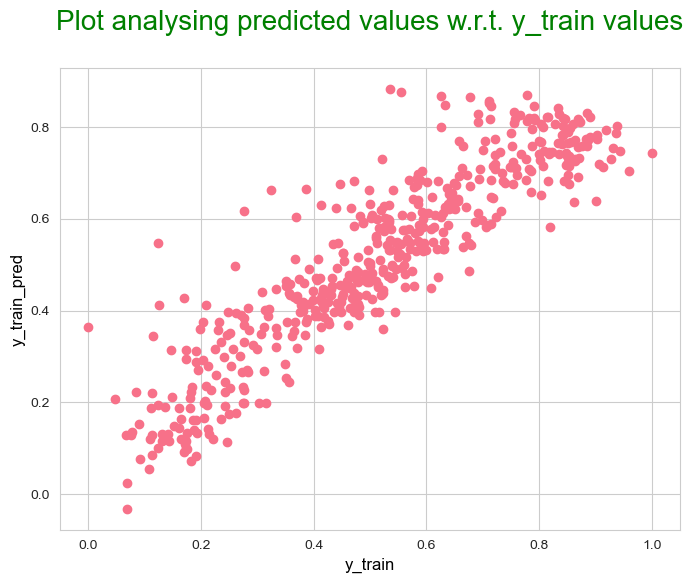

In [103]:
plt.figure(figsize=(8,6))
plt.scatter(y_train, y_train_pred)
plt.title("Plot analysing predicted values w.r.t. y_train values\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("y_train", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.ylabel("y_train_pred", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

In [104]:
res = y_train - y_train_pred  # Calculate the residuals

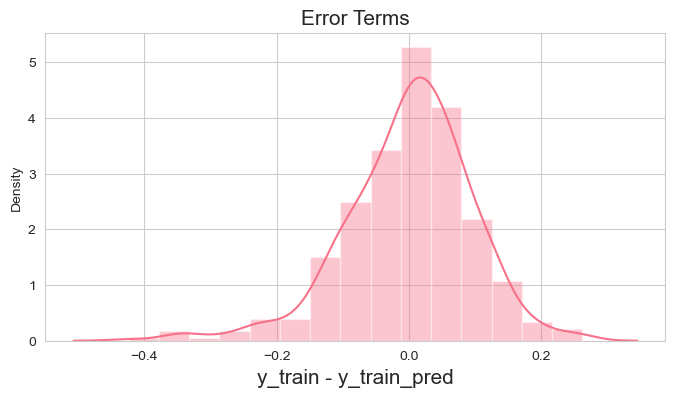

In [105]:
plt.figure(figsize=(8,4))
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

Inference :
1. Scatter plot of y_train and y_train_pred shows that our model has predicted the values very well for train
data.
2. The distribution plot shows that error terms are normally distributed.

### 5. Making predictions for test data

5.1 Preparing test data for analysis and prediction.

In [106]:
df_test.head()

,dteday,yr,mnth,holiday,weekday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,light_rain,misty
184,3,0,6,1,1,0,0.665417,0.637917,0.081479,6043,0,0,0,0,1
535,18,1,5,0,2,1,0.654692,0.690000,0.148017,6825,0,1,0,0,0
299,26,0,9,0,4,1,0.457046,0.812917,0.197763,2659,0,0,1,0,1
221,9,0,7,0,3,1,0.684983,0.424167,0.200258,4780,0,0,0,0,0
152,1,0,5,0,4,1,0.643942,0.305000,0.292287,4968,0,1,0,0,0


In [107]:
scale_var = ["dteday", "mnth","weekday", "atemp", "hum", "windspeed", "cnt"]

In [108]:
df_test[scale_var] = scaler.transform(df_test[scale_var])  # Scaling of test set using scaler.transform

In [109]:
df_test.describe()

,dteday,yr,mnth,holiday,weekday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,light_rain,misty
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.498485,0.481818,0.498347,0.040909,0.499242,0.722727,0.533778,0.643464,0.319953,0.517140,0.254545,0.263636,0.231818,0.031818,0.313636
std,0.285446,0.500809,0.310752,0.198531,0.321912,0.448673,0.214914,0.142479,0.169883,0.217540,0.436599,0.441609,0.422956,0.175916,0.465029
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025950,0.314298,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.233333,0.000000,0.272727,0.000000,0.166667,0.000000,0.344870,0.544439,0.198841,0.374885,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.466667,0.000000,0.454545,0.000000,0.500000,1.000000,0.555003,0.637548,0.302796,0.522492,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.766667,1.000000,0.727273,0.000000,0.833333,1.000000,0.715799,0.740026,0.418445,0.668891,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.980934,1.002146,0.858328,0.981707,1.000000,1.000000,1.000000,1.000000,1.000000


Dividing into X_test and y_test

In [110]:
y_test = df_test.pop('cnt')
X_test = df_test

In [111]:
X_test.head()

,dteday,yr,mnth,holiday,weekday,workingday,atemp,hum,windspeed,spring,summer,winter,light_rain,misty
184,0.100000,0,0.545455,1,0.166667,0,0.769660,0.657364,0.084219,0,0,0,0,1
535,0.600000,1,0.454545,0,0.333333,1,0.755582,0.711035,0.227262,0,1,0,0,0
299,0.866667,0,0.818182,0,0.666667,1,0.496145,0.837699,0.334206,0,0,1,0,1
221,0.300000,0,0.636364,0,0.500000,1,0.795343,0.437098,0.339570,0,0,0,0,0
152,0.033333,0,0.454545,0,0.666667,1,0.741471,0.314298,0.537414,0,1,0,0,0


In [112]:
X_train.head()

,yr,atemp,windspeed,spring,light_rain,misty
576,1,0.795348,0.239301,0,0,0
426,1,0.368552,0.220569,1,0,1
729,1,0.200348,0.663106,1,0,0
482,1,0.490358,0.656397,0,0,0
111,0,0.318819,0.380981,0,0,1


In [113]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train.columns]

In [114]:
X_test_new.head()

,yr,atemp,windspeed,spring,light_rain,misty
184,0,0.769660,0.084219,0,0,1
535,1,0.755582,0.227262,0,0,0
299,0,0.496145,0.334206,0,0,1
221,0,0.795343,0.339570,0,0,0
152,0,0.741471,0.537414,0,0,0


In [115]:
X_test_sm = sm.add_constant(X_test_new)     # add a constant

5.2 Making Predictions

In [116]:
# Making predictions
y_test_pred = lr.predict(X_test_sm)

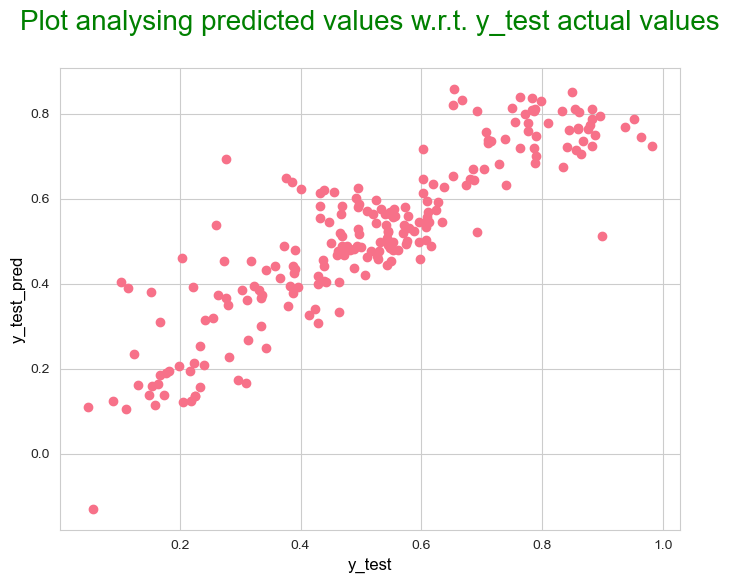

In [117]:
# Scatter plot for y_test and y_test_pred
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_test_pred)
plt.title("Plot analysing predicted values w.r.t. y_test actual values\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("y_test", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.ylabel("y_test_pred", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

In [118]:
res_test = y_test - y_test_pred      # Calculate the residuals

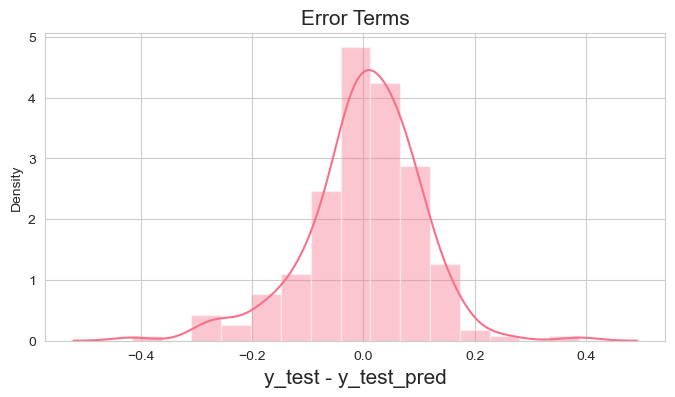

In [119]:
# Distribution of error terms

plt.figure(figsize=(8,4))
sns.distplot(res_test, bins = 15)
plt.title('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_test - y_test_pred', fontsize = 15)         # X-label
plt.show()

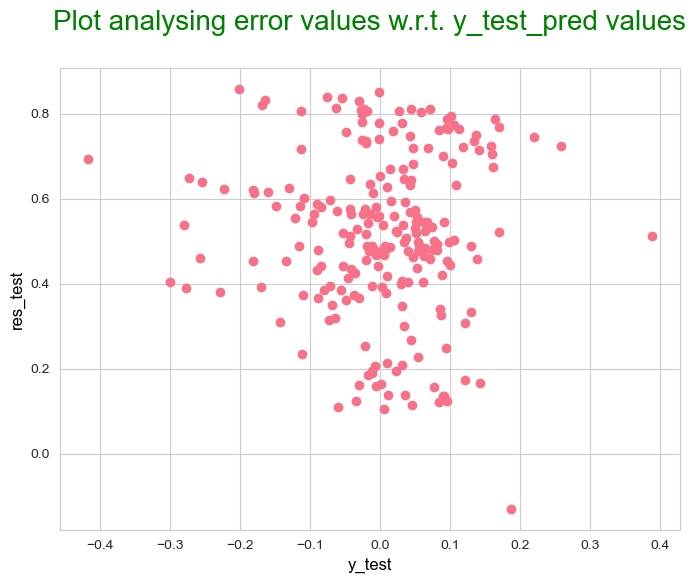

In [120]:
# Scatter plot for y_test and y_test_pred
plt.figure(figsize=(8,6))
plt.scatter(res_test, y_test_pred)
plt.title("Plot analysing error values w.r.t. y_test_pred values\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("y_test", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.ylabel("res_test", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

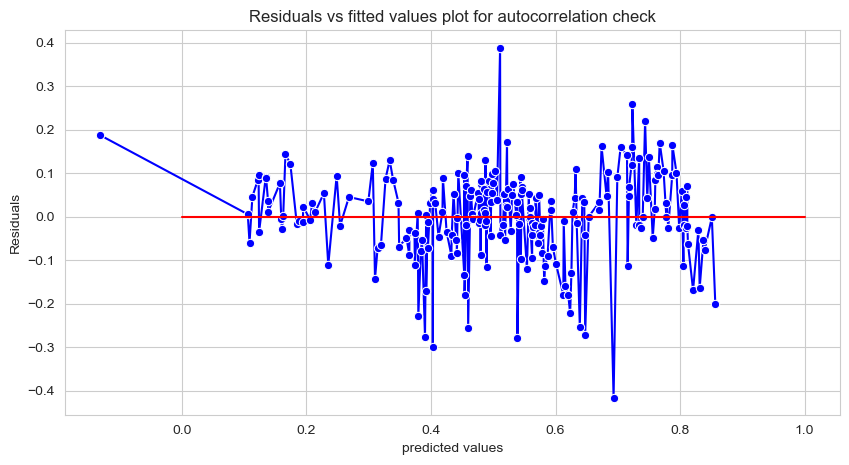

In [121]:
plt.figure(figsize=(10,5))
p = sns.lineplot(y_test_pred,res_test,marker='o',color='blue')
plt.xlabel('predicted values')
plt.ylabel('Residuals')
p = sns.lineplot([0,1],[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for autocorrelation check')

Inference :
1. Scatter plot of y_test and y_test_pred shows that our model has predicted the values very well for test
data as well.
2. The distribution plot shows that error terms for test data follow normal distribution.
3. Scatter plot of residuals and y_test_pred shows that there is no pattern in error terms. This confirms the homoscedasticity assumption of linear regression.
4. Line plot of residuals shows that they are independent that means there is no correlation between them and are distributed around mean 0.

### 6. Calculating R-squared value

In [122]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.7773282144376145

Adjusted R-squared value

In [123]:
X_test_new.shape

(220, 6)

In [124]:
R = 0.7931          # R_squared value that we got above

N = X_test_new.shape[0] # No. of rows for test data that means sample points

P = X_test_new.shape[1]  # Number of features (predictors) 

# Adjusted R-squared formula:

adjusted_r_sq = 1-((1-R)*(N-1)/(N-P-1))

adjusted_r_sq

0.7872718309859155

#### ***Train data :
1. R-squared value : 0.811
2. Adjusted R-squared value : 0.809

#### ***Test data :
1. R-squared value : 0.793
2. Adjusted R-squared value : 0.787

### Our Model is ready and all assumptions of Linear Regression are verified successfully.

In [125]:
lr.params

const         0.326205
yr            0.239448
atemp         0.368028
windspeed    -0.151271
spring       -0.163592
light_rain   -0.272562
misty        -0.074601
dtype: float64

Model Equation :
cnt = 0.311914 + (0.387364 x atemp) + (0.236879 x yr) - (268408 x light_rain) - (0.153304 x spring) - (0.143759 x windspeed) - (0.075841 x misty)

#### Top 3 Significant Variables and interpretation of their co-efficients:
atemp: A coefficient value of 0.387364 indicates that a unit increase in atemp variable, increases the bikes demand by 0.387364 units.


yr: Basically there is a positive correlation between yr and bikes hire number. This is evident from EDA as well. A coefficient value of 0.236879 indicates that a unit increase in yr variable, increases the bikes demand by 0.236879 units.


light_rain: A coefficient value of ‘-0.268408’ indicates that a unit increase in light_rain variable, decreases the bikes demand by 0.268408 units.

#### Recommendations to BB company:
1. Demand for shared bikes is going to increase year by year among the people, after this ongoing quarantine situation ends.

2. The best period for good business, when bikes demand is highest, is summer and early fall - June to September months every year. (This is evident from EDA and also since atemp variable is the most significant variable of our model).

3. Bikes demands will be high on a working day, in clear weather.

4. During the spring the bikes demand may decrease, but as the spring ends and summer starts the demand for bikes will increase.

5. Light rains may affect the demand for bikes.

6. On the days when windspeed is high, (typically this may happen in March and April months), the demand for bikes will remain low.

**************************************************************************************************

#### Identification the outliers

Z-score method: 

The z-score measures how many standard deviations a data point is from the mean. By calculating the z-score for each data point, you can identify any points that are more than a certain number of standard deviations away from the mean (e.g. z-score greater than 3 or less than -3) and consider them to be outliers.

In [128]:
# Generate some example data
bikes = pd.DataFrame({'temp': np.random.normal(0, 1, 100), # Generates 100 random values from a normal distribution with mean 0 and standard deviation 1, and assigns them to the 'temp' column
                     'atemp': np.random.normal(10, 2, 100), # Generates 100 random values from a normal distribution with mean 10 and standard deviation 2, and assigns them to the 'atemp' column
                     'hum': np.random.normal(-5, 5, 100)}) # Generates 100 random values from a normal distribution with mean -5 and standard deviation 5, and assigns them to the 'hum' column

# Define a function to calculate the z-score for each data point
def zscore(series):
    return (series - series.mean()) / series.std()

# Apply the zscore function to each column of the data frame
z_scores = bikes.apply(zscore)

# Identify any data points with a z-score greater than 3 or less than -3
outliers = bikes[(z_scores > 3).any(axis=1) | (z_scores < -3).any(axis=1)]

# Print the outliers
print(outliers)

        temp     atemp       hum
95  2.693836  8.912469 -3.408007


In [ ]:
#In this code, we first generate some example data in the form of a Pandas DataFrame. We then define a function zscore that takes a Pandas Series (i.e. a single column of the DataFrame) as input and returns the z-score for each data point in that column. We apply this function to each column of the DataFrame using the apply method.

#The code you provided generates a Pandas DataFrame called bikes with three columns, each containing 100 randomly generated values from a normal distribution with different mean and standard deviation parameters.

#Next, we identify any data points with a z-score greater than 3 or less than -3 using the any method to check whether any values in the DataFrame are outside of the specified range. We use the | operator to combine the results for each column, so that a row will be considered an outlier if any of its columns have a z-score outside of the specified range. Finally, we print the outliers, which are any rows of the original DataFrame that have at least one outlier in any of their columns.

# ... The choice of z-score range to use when identifying outliers using the z-score method is somewhat subjective and may depend on the specific characteristics of your data and your analysis goals. A common convention is to consider any data point with a z-score greater than 3 or less than -3 to be an outlier, as these values correspond to data points that are more than 3 standard deviations away from the mean in either direction.
#However, the choice of z-score range should be based on your understanding of the distribution of your data and the potential sources of variability. For example, if your data has a very wide distribution or contains extreme values, you may want to use a larger z-score range to identify outliers. Conversely, if your data has a very narrow distribution or contains few extreme values, you may want to use a smaller z-score range to avoid identifying too many false positives as outliers.
#Ultimately, it's important to carefully consider the potential impact of outliers on your analysis and to use a range that makes sense for your specific research question and data characteristics.

#### To remove or handle the outliers

In [132]:
# Remove outliers from the DataFrame
bikes_no_outliers = z_scores.drop(outliers.index)

#### Checking if it works...

In [133]:
# Generate some example data
bikes_no_outliers = pd.DataFrame({'temp': np.random.normal(0, 1, 100),
                     'atemp': np.random.normal(10, 2, 100),
                     'hum': np.random.normal(-5, 5, 100)})

# Define a function to calculate the z-score for each data point
def zscore(series):
    return (series - series.mean()) / series.std()

# Apply the zscore function to each column of the data frame
z_scores = bikes_no_outliers.apply(zscore)

# Identify any data points with a z-score greater than 3 or less than -3
outliers = bikes_no_outliers[(z_scores > 3).any(axis=1) | (z_scores < -3).any(axis=1)]

# Print the outliers
print(outliers)

Empty DataFrame
Columns: [temp, atemp, hum]
Index: []


#### ...It has worked

The Interquartile range (IQR) method:, you can use the quantile method of Pandas DataFrame to compute the first and third quartiles, and then calculate the IQR as the difference between them.

Once you have computed the IQR, you can define outliers as any data point that falls below the first quartile minus 1.5 times the IQR, or above the third quartile plus 1.5 times the IQR.

The example code snippet that demonstrates how to identify outliers using the IQR method:

python
Copy code
.# Generate a sample DataFrame
import pandas as pd
import numpy as np
df = pd.DataFrame(np.random.randn(100, 4), columns=list('ABCD'))

.# Calculate the first and third quartiles
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

.# Calculate the IQR
IQR = Q3 - Q1

...# Define outliers as any value below Q1 - 1.5*IQR or above Q3 + 1.5*IQR
outliers = df[(df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))].dropna()

In this code, we first generate a sample DataFrame df with 100 rows and 4 columns of random data. We then calculate the first and third quartiles using the quantile method of the DataFrame. We use a parameter of 0.25 and 0.75 to specify the first and third quartiles, respectively.

We then calculate the IQR as the difference between the third and first quartiles. Finally, we define outliers as any data point that falls below Q1 - 1.5IQR or above Q3 + 1.5IQR. The resulting outliers are stored in a new DataFrame called outliers.

**Note:
 ...that this method assumes that the data is normally distributed. If the data is skewed or has a different distribution, other methods such as the z-score method or visual inspection may be more appropriate for identifying outliers.